using the refernece https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.89.023005, the differential equation for the number of atoms trapped in the mot is

$$ \frac{dN}{dt} = R - \gamma N - \beta N (N-1) $$

where $\gamma$ is the one-atom collision rate (due to the collisions with the atoms in the cloud),
$\beta$ is the two-atom collision rate (due to the collision of two trapped ions) and $R$ is the loading rate. 

for $N \gg 1$: the ladder differential equation is valid

else one can run a monte carlo simulation with the following rules:

- $N$ is the number of atoms in the trap
- $R$ is the flux of atoms that fill the trap
- $\gamma N$ is the flux of atoms that leave the trap due to the one-atom collisions
- $\beta N(N-1)$ is the flux of atoms that leave the trap due to the two-atom collisions


In [3]:
import numpy as np
import numpy.random as rnp
import matplotlib.pyplot as plt

In [22]:
class dipolar_trap:
    def __init__(self, N0, R, gamma, beta) -> None:
        self.N = [N0]
        self.R = R
        self.gamma = gamma
        self.beta = beta
        pass

    def evolve(self, steps):
        for i in range(steps):
            new_N = self.N[-1] + rnp.poisson(self.R)
            if new_N>0:
                new_N += -rnp.binomial(new_N, self.gamma)
                if new_N>1:
                    if self.beta*new_N>1:
                        new_N = 1
                    new_N += -rnp.binomial(new_N-1, self.beta*new_N)
            self.N .append(new_N)
        return 
    
    def show(self):
        plt.plot(self.N)
        plt.show()
        return

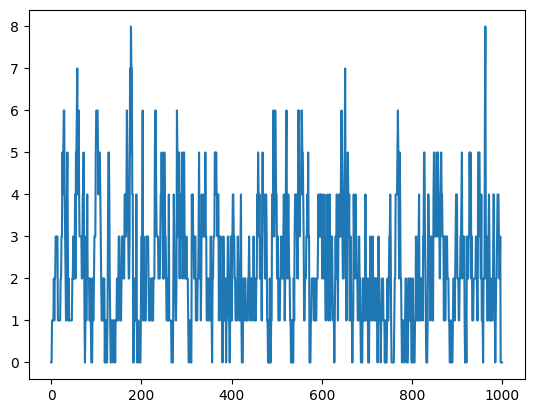

In [27]:
N0 = 0
R = 1
gamma = 0.3
beta = 0.004

dip_trap = dipolar_trap(N0, R, gamma, beta)
dip_trap.evolve(1000)
dip_trap.show()